# 20 Pandas Functions for 80% of your Data Science Tasks
ref infomation: https://levelup.gitconnected.com/20-pandas-functions-for-80-of-your-data-science-tasks-b610c8bfe63c
<br>ref dataset : https://www.kaggle.com/datasets/rkiattisak/salaly-prediction-for-beginer?select=Salary+Data.csv

## Practice for using 'Pandas'

### 1. pd.read_csv()

In [274]:
#pip install pandas
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/siravit-pim/Second_Brain/main/Salary_DataSample.csv")

### 2. df.describe()

In [13]:
df.describe(include='all')
#df.describe(exclude='number')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373,373,373,373.000000,373.000000
unique,NaN,2,3,174,NaN,NaN
top,NaN,Male,Bachelor's,Director of Marketing,NaN,NaN
freq,NaN,194,224,12,NaN,NaN
mean,37.431635,NaN,NaN,NaN,10.030831,100577.345845
std,7.069073,NaN,NaN,NaN,6.557007,48240.013482
min,23.000000,NaN,NaN,NaN,0.000000,350.000000
25%,31.000000,NaN,NaN,NaN,4.000000,55000.000000
50%,36.000000,NaN,NaN,NaN,9.000000,95000.000000
75%,44.000000,NaN,NaN,NaN,15.000000,140000.000000


### 3. df.info()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


### 4. df.plot()

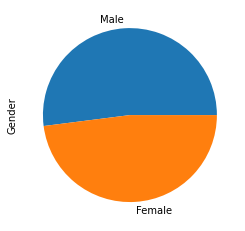

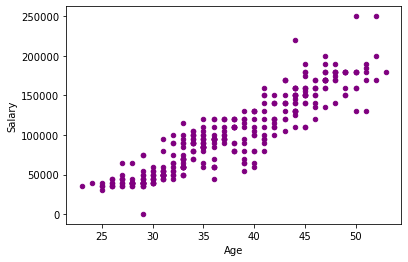

In [82]:
df['Gender'].value_counts().plot(kind='pie') \
,df.plot.scatter(x='Age', y='Salary', c='purple');

### 5. df.iloc() --select

In [120]:
df.iloc[0:1] # select the first 2 rows

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0


In [121]:
df.iloc[:2, 0:3] # select column (start 0)

,Age,Gender,Education Level
0,32.0,Male,Bachelor's
1,28.0,Female,Master's


### 6. df.loc()

In [125]:
df.loc[:1,['Age','Salary']]

,Age,Salary
0,32.0,90000.0
1,28.0,65000.0


### 7. df.assign() --add new column

In [184]:
df_new = df.assign(WHT=df['Salary']*0.03)

import numpy as np
df_new['row_number'] = np.arange(len(df))
df_new.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,WHT,row_number
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,2700.0,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,1950.0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,4500.0,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,1800.0,3
4,52.0,Male,Master's,Director,20.0,200000.0,6000.0,4


### 8. df.query()

In [187]:
df.query('Salary >= 200000 & Age <= 50')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
30,50.0,Male,Bachelor's,CEO,25.0,250000.0
53,47.0,Male,Master's,VP of Finance,19.0,200000.0
105,44.0,Male,PhD,Chief Data Officer,16.0,220000.0


### 9. df.sort_values()

In [242]:
df.sort_values(by='Salary', ascending=False).query('`Job Title` == "Data Analyst"').head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
81,41.0,Female,Master's,Data Analyst,13.0,80000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0


### 10. df.sample()

In [255]:
df.sample(n= 5, replace= True)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
140,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
16,33.0,Female,Master's,Marketing Manager,7.0,90000.0
374,44.0,Female,PhD,Senior Business Analyst,15.0,150000.0


### 11. df.isnull()

In [275]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

### 12. df.fillna()

### 13. df.dropna()

In [276]:
df = df.dropna()
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

### 14. df.drop()

In [326]:
df_drop = df.drop([0,5]) #rows
df_drop = df.drop(['Age','Gender'], axis=1) #column
df_drop.head(1)

,Education Level,Job Title,Years of Experience,Salary
0,Bachelor's,Software Engineer,5.0,90000.0


### 15. pd.pivot_table()

In [385]:
df_pivot = pd.pivot_table(df, index=['Education Level','Gender'], values='Salary', aggfunc=['mean'])
df_pivot

mean
                               Salary
Education Level Gender               
Bachelor's      Female   71019.417476
                Male     77936.776860
Master's        Female  120200.000000
                Male    139791.666667
PhD             Female  155384.615385
                Male    160400.000000

In [391]:
df_pivot2 = pd.pivot_table(df, index='Job Title', values='Salary', aggfunc='mean')
df_pivot2 = df_pivot.sort_values(by='Salary', ascending=False)
df_pivot2

,Salary
Job Title,
CEO,250000.0
Chief Technology Officer,250000.0
Chief Data Officer,220000.0
VP of Finance,200000.0
Director,200000.0
...,...
Data Entry Clerk,35000.0
Help Desk Analyst,35000.0
Junior Customer Support Specialist,35000.0


### 16. df.groupby()

In [397]:
df_grouped = df.groupby('Gender')
df_grouped.mean()

,Age,Years of Experience,Salary
Gender,,,
Female,37.581006,10.011173,97011.173184
Male,37.293814,10.048969,103867.783505


### 17. df.transpose()

In [404]:
df_transponsed = df.T
df_transponsed

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
Age,32.0,28.0,45.0,36.0,52.0,29.0,42.0,31.0,26.0,38.0,...,43.0,31.0,41.0,44.0,33.0,35.0,43.0,29.0,34.0,44.0
Gender,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male,...,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female
Education Level,Bachelor's,Master's,PhD,Bachelor's,Master's,Bachelor's,Master's,Bachelor's,Bachelor's,PhD,...,Master's,Bachelor's,Bachelor's,PhD,Bachelor's,Bachelor's,Master's,Bachelor's,Bachelor's,PhD
Job Title,Software Engineer,Data Analyst,Senior Manager,Sales Associate,Director,Marketing Analyst,Product Manager,Sales Manager,Marketing Coordinator,Senior Scientist,...,Director of Marketing,Junior Financial Analyst,Senior Product Manager,Senior Data Engineer,Junior Business Analyst,Senior Marketing Analyst,Director of Operations,Junior Project Manager,Senior Operations Coordinator,Senior Business Analyst
Years of Experience,5.0,3.0,15.0,7.0,20.0,2.0,12.0,4.0,1.0,10.0,...,18.0,3.0,14.0,16.0,4.0,8.0,19.0,2.0,7.0,15.0
Salary,90000.0,65000.0,150000.0,60000.0,200000.0,55000.0,120000.0,80000.0,45000.0,110000.0,...,170000.0,50000.0,150000.0,160000.0,60000.0,85000.0,170000.0,40000.0,90000.0,150000.0


### 18. df.merge()

In [408]:
df1 = pd.DataFrame({'key': ['A', 'B', 'C', 'D'],
                   'value': [1, 2, 3, 4]})

df2 = pd.DataFrame({'key': ['B', 'D', 'E', 'F'],
                   'value': [5, 6, 7, 8]})

merged_df = df1.merge(df2, on='key')

merged_df

,key,value_x,value_y
0,B,2,5
1,D,4,6


### 19. df.rename()

In [338]:
df_rename = df.rename(columns={'Gender' : 'Sex', 'Education Level': 'Degree'})
df_rename.head(1)

,Age,Sex,Degree,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0


### 20. df.to_csv()

In [296]:
df.to_csv("/Users/siravit.pim/desktop/test_data.csv")